In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import eig
from scipy.linalg import inv

%matplotlib notebook

In [29]:
def ellipse(sigma, mean, scale=1):
    
    d, v = eig(inv(sigma))
    mat = v @ inv(np.sqrt(np.diag(d)))

    N = 200
    t = np.arange(0, N) * (2*np.pi) / N

    Y1 = scale * np.cos(t)
    Y2 = scale * np.sin(t)
   
    Y = np.array([Y1, Y2])

    X = mat.dot(Y)

    X1 = X[0]
    X2 = X[1]

    #print("Y1: {}, len: {}".format(Y1, len(Y1)))
    #print("Y2: {}, len: {}".format(Y2, len(Y2)))
    #print("Y: {}, len: {}".format(Y, len(Y)))
    #print("X1: {}, len: {}".format(X1, len(X1)))
    #print("X1: {}, len: {}".format(X1, len(X1)))

    # move ellipse to mean_k
    X1 = X1 + mean[0]
    X2 = X2 + mean[1]
    
    return X1, X2

In [25]:
def plot(samples, parameters):

    sam_a = samples["a"]
    sam_o = samples["o"]
    sam_u = samples["u"]

    data = (sam_a.T, sam_o.T, sam_u.T)
    colors = ("red", "green", "blue")
    groups = ("a", "o", "u")
    scales = (2, 2, 2)

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    for data, color, group in zip(data, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    for color, group, scale in zip(colors, groups, scales):
        X1, X2 = ellipse(parameters["sigma"][group], parameters["mean"][group], scale=scale)
        ax.plot(X1, X2, c=color)
    
    plt.title('A,O,U scatter')
    plt.legend(loc=2)
    plt.show()

In [19]:
def main():

    # parse data
    with open('a.txt') as f:
        lines_a = list(csv.reader(f, delimiter='\t'))

    with open('o.txt') as f:
        lines_o = list(csv.reader(f, delimiter='\t'))

    with open('u.txt') as f:
        lines_u = list(csv.reader(f, delimiter='\t'))

    lines_a = list(map(lambda x: [int(x[0]), int(x[1])],lines_a))
    lines_o = list(map(lambda x: [int(x[0]), int(x[1])],lines_o))
    lines_u = list(map(lambda x: [int(x[0]), int(x[1])],lines_u))

    # separate 'train' and 'test' datasets
    train_a = np.array(lines_a[:34])
    test_a = np.array(lines_a[35:])
    
    train_o = np.array(lines_o[:34])
    test_o = np.array(lines_o[35:])
    
    train_u = np.array(lines_u[:34])
    test_u = np.array(lines_u[35:])

    x_tot = len(train_a) + len(train_o) + len(train_u)

    # mean calc
    mean_a = np.mean(train_a, axis=0)
    mean_o = np.mean(train_o, axis=0)
    mean_u = np.mean(train_u, axis=0)
    
    sigma_a = np.cov(train_a, rowvar=False)
    sigma_o = np.cov(train_o, rowvar=False)
    sigma_u = np.cov(train_u, rowvar=False)

    # sigma calc
    sigma = (sigma_a + sigma_o + sigma_u) / 3

    # plot
    samples = {
        "a": train_a,
        "o": train_o,
        "u": train_u
    }
    
    parameters = {
        "mean": {
            "a": mean_a,
            "o": mean_o,
            "u": mean_u
        },
        "sigma": {
            "a": sigma_a,
            "o": sigma_o,
            "u": sigma_u,
        }
    }

    plot(samples, parameters)

<IPython.core.display.Javascript object>


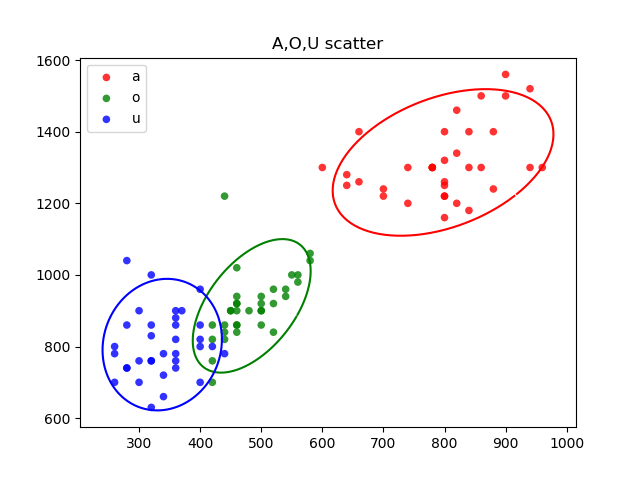

In [30]:
main()